In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("American Express AmExpert 2018/train.csv")
test=pd.read_csv("American Express AmExpert 2018/test.csv")

We will make copy of train and test data we would not lose the original datasets

In [3]:
train_original=train.copy()
test_original=test.copy()

We will check which columns are present in train and test dataset

In [4]:
print(train.columns)
print(train.shape)

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')
(463291, 15)


In [5]:
print(test.columns)
print(test.shape)

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1'],
      dtype='object')
(128858, 14)


Train data have 14 independent variables and 1 target variable, i.e. 'is_click' with total 463291 rows wheras 'is_click' is absent in Test data with 128858 rows

In [6]:
# Print data types for each variable
print(train.dtypes)

session_id                  int64
DateTime                   object
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
product_category_2        float64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object


In [7]:
#Data Sample of train data
print(train.head())

   session_id          DateTime  user_id product  campaign_id  webpage_id  \
0      140690  2017-07-02 00:00   858557       C       359520       13787   
1      333291  2017-07-02 00:00   243253       C       105960       11085   
2      129781  2017-07-02 00:00   243253       C       359520       13787   
3      464848  2017-07-02 00:00  1097446       I       359520       13787   
4       90569  2017-07-02 00:01   663656       C       405490       60305   

   product_category_1  product_category_2  user_group_id  gender  age_level  \
0                   4                 NaN           10.0  Female        4.0   
1                   5                 NaN            8.0  Female        2.0   
2                   4                 NaN            8.0  Female        2.0   
3                   3                 NaN            3.0    Male        3.0   
4                   3                 NaN            2.0    Male        2.0   

   user_depth  city_development_index  var_1  is_click  
0    

In [8]:
#Frequency table of a variable will give us the count of each category in that variable.
train['is_click'].value_counts()

0    431960
1     31331
Name: is_click, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number 
train['is_click'].value_counts(normalize=True)

0    0.932373
1    0.067627
Name: is_click, dtype: float64

Only 6.76% is_click are 1

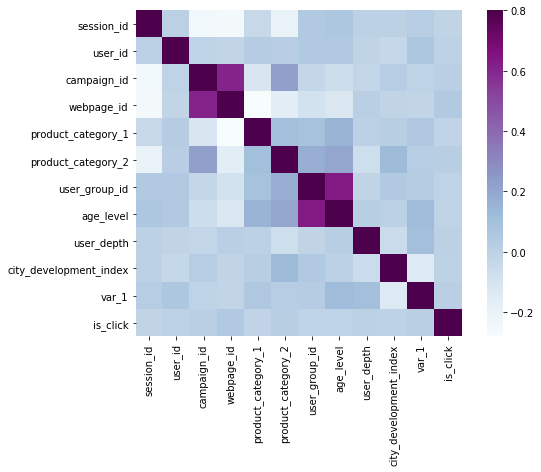

In [10]:
#Correlation between all the numerical variables. 
#The variables with darker color means their correlation is more.
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [11]:
train.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [12]:
#look at the value count of the NA feature variables.
print(train['user_group_id'].value_counts())
print(train['gender'].value_counts())
print(train['age_level'].value_counts())
print(train['user_depth'].value_counts())
print(train['city_development_index'].value_counts())
print(train['user_id'].value_counts())
print(train['campaign_id'].value_counts())
print(train['webpage_id'].value_counts())


3.0     140317
2.0     137278
4.0      50080
1.0      41946
5.0      21989
9.0      20264
10.0     13779
11.0      8839
8.0       6223
6.0       1724
7.0       1421
12.0      1035
0.0        153
Name: user_group_id, dtype: int64
Male      393454
Female     51594
Name: gender, dtype: int64
3.0    160581
2.0    143501
4.0     63859
1.0     43367
5.0     30828
6.0      2759
0.0       153
Name: age_level, dtype: int64
3.0    402798
2.0     30389
1.0     11861
Name: user_depth, dtype: int64
2.0    147643
3.0     88709
4.0     67166
1.0     34644
Name: city_development_index, dtype: int64
658554     255
297960     225
983136     187
422201     157
929999     143
18434      141
378888     138
1045409    136
577452     135
678048     130
697407     130
1045598    129
643342     127
580576     124
245794     123
107073     115
357044     113
420305     112
890857     112
1113267    112
757785     109
536381     108
390501     108
452547     108
773884     107
1080890    104
830188     104
10527

In [13]:
#we will replace the missing values in this variables using the mode of this variables
train = train.drop(columns=['product_category_2','user_id'])
train['user_group_id'].fillna(train['user_group_id'].mode()[0], inplace=True)
train['gender'].fillna(train['gender'].mode()[0], inplace=True)
train['age_level'].fillna(train['age_level'].mode()[0], inplace=True)
train['user_depth'].fillna(train['user_depth'].mode()[0], inplace=True)
train['city_development_index'].fillna(train['city_development_index'].mode()[0], inplace=True)

In [14]:
#Now lets check whether all the missing values are filled in the train dataset.
train.isnull().sum()

session_id                0
DateTime                  0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [15]:
#We can see that all the missing values have been filled in the test dataset.
#Let’s fill all the missing values in the test dataset too with the same approach.
test = test.drop(columns=['product_category_2','user_id'])
test['user_group_id'].fillna(test['user_group_id'].mode()[0], inplace=True)
test['gender'].fillna(test['gender'].mode()[0], inplace=True)
test['age_level'].fillna(test['age_level'].mode()[0], inplace=True)
test['user_depth'].fillna(test['user_depth'].mode()[0], inplace=True)
test['city_development_index'].fillna(test['city_development_index'].mode()[0], inplace=True)

In [16]:
#Now lets check whether all the missing values are filled in the test dataset.
test.isnull().sum()

session_id                0
DateTime                  0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
dtype: int64

In [17]:
#We will transform DateTime Column, First Object to String 
train['DateTime'] = train['DateTime'].astype('str')
train['DateTime'] = train['DateTime'].astype(str).str[:-6].astype(np.str)

test['DateTime'] = test['DateTime'].astype('str')
test['DateTime'] = test['DateTime'].astype(str).str[:-6].astype(np.str)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lbl_enc = LabelEncoder()
train['DateTime'] = lbl_enc.fit_transform(train['DateTime'])
train['product'] = lbl_enc.fit_transform(train['product'])
train['gender'] = lbl_enc.fit_transform(train['gender']) #0 for Female and 1 for Male
train['campaign_id'] = lbl_enc.fit_transform(train['campaign_id'])
train['webpage_id'] = lbl_enc.fit_transform(train['webpage_id'])

In [20]:
#Same for test Data
test['DateTime'] = lbl_enc.fit_transform(test['DateTime'])
test['product'] = lbl_enc.fit_transform(test['product'])
test['gender'] = lbl_enc.fit_transform(test['gender']) #0 for Female and 1 for Male
test['campaign_id'] = lbl_enc.fit_transform(test['campaign_id'])
test['webpage_id'] = lbl_enc.fit_transform(test['webpage_id'])

In [21]:
print(train.head())

   session_id  DateTime  product  campaign_id  webpage_id  product_category_1  \
0      140690         0        2            4           3                   4   
1      333291         0        2            2           2                   5   
2      129781         0        2            4           3                   4   
3      464848         0        8            4           3                   3   
4       90569         0        2            8           8                   3   

   user_group_id  gender  age_level  user_depth  city_development_index  \
0           10.0       0        4.0         3.0                     3.0   
1            8.0       0        2.0         2.0                     2.0   
2            8.0       0        2.0         2.0                     2.0   
3            3.0       1        3.0         3.0                     2.0   
4            2.0       1        2.0         3.0                     2.0   

   var_1  is_click  
0      0         0  
1      0         0  

Let’s build a logistic regression model and make predictions for the test dataset.

In [22]:
#Sklearn requires the target variable in a separate dataset. 
#We will drop our target variable from the train dataset and save it in another dataset.
X = train.drop(columns=['is_click','session_id'])
y = train['is_click']
test = test.drop(columns=['session_id'])

In [27]:
#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

The dataset has been divided into training and validation part

In [29]:
#Let’s import StratifiedKFold from sklearn and fit the model.
from sklearn.model_selection import StratifiedKFold

In [30]:
from sklearn import tree

#Let’s fit the decision tree model with 5 folds of cross validation.

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.9292135680290096

2 of kfold 5
accuracy_score 0.9294610287293056

3 of kfold 5
accuracy_score 0.9297200457596754

4 of kfold 5
accuracy_score 0.9296121219970213

5 of kfold 5
accuracy_score 0.9290401260549548


In [32]:
submission=pd.read_csv("American Express AmExpert 2018/sample_submission_2s8l9nF.csv")

submission['session_id']=test_original['session_id']
submission['is_click']=pred_test

#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.
pd.DataFrame(submission, columns=['session_id','is_click']).to_csv('American Express AmExpert 2018/Final 18.11.18.csv',index=False)